In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display, clear_output
import random

%matplotlib inline  

df = pd.read_csv(r"TravisRollsDataset.csv")
df.head()

,id,season,episode,roll,mod,basis,type,adv,critical
0,2,3,1,13,0,wisdom,save,none,none
1,3,3,1,17,0,investigation,check,none,none
2,4,3,1,4,2,dexterity,save,none,none
3,6,3,2,16,7,melee,attack,none,none
4,7,3,2,16,7,melee,attack,advantage,none


In [2]:
def assess_important(x):
    if x['adv']=="disadvantage" or x['basis'] in ["melee", "ranged", "dexterity", "strength"]:
        return 1
    else:
        return 0

df['important'] = df.apply(assess_important, axis=1)

df['rolled'] = pd.Categorical(df.roll.apply(lambda x: "high" if x>10 else "low"), categories=["low", "high"], ordered=True)
df.head()

,id,season,episode,roll,mod,basis,type,adv,critical,important,rolled
0,2,3,1,13,0,wisdom,save,none,none,0,high
1,3,3,1,17,0,investigation,check,none,none,0,high
2,4,3,1,4,2,dexterity,save,none,none,1,low
3,6,3,2,16,7,melee,attack,none,none,1,high
4,7,3,2,16,7,melee,attack,advantage,none,1,high


In [3]:
str_to_num_cols = ["basis", "type", "adv", "critical"]
lookup_encodings = []
for col in str_to_num_cols:
    vals = list(df[col].unique())
    numlist = list(range(len(vals)))
    random.shuffle(numlist)
    tmpdict = dict(zip(vals, numlist))
    lookup_encodings.append(tmpdict)

In [4]:
df_encoded = df.copy()
for i, col in enumerate(str_to_num_cols):
    df_encoded[col] = df_encoded[col].replace(lookup_encodings[i])
df_encoded.head()

,id,season,episode,roll,mod,basis,type,adv,critical,important,rolled
0,2,3,1,13,0,13,2,0,2,0,high
1,3,3,1,17,0,7,3,0,2,0,high
2,4,3,1,4,2,8,2,0,2,1,low
3,6,3,2,16,7,19,0,0,2,1,high
4,7,3,2,16,7,19,0,1,2,1,high


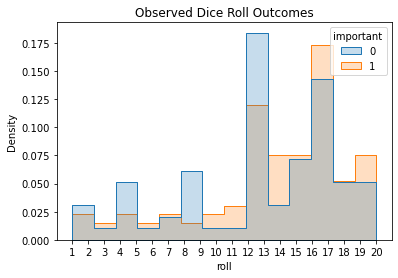

In [5]:
f, ax = plt.subplots()

rollhist = sns.histplot(data=df_encoded, x="roll", hue='important', element="step",
    stat="density", common_norm=False, ax=ax)
rollhist.set_title("Observed Dice Roll Outcomes")
rollhist.set(xticks=list(np.arange(1,21,1)));

In [6]:
die_sides = list(range(1,21))
p_adj = [0.0484 if x <11 else 0.0516 for x in die_sides]
df_expected = pd.DataFrame(die_sides, columns=["roll"])
df_expected["density"] = p_adj

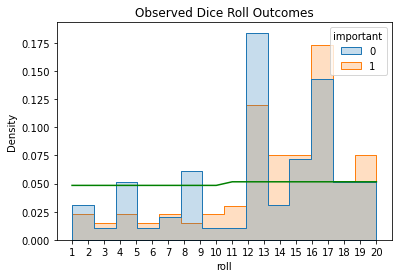

In [7]:
clear_output(wait = True)
ax.plot(die_sides, p_adj, 'g-', label='Expected Density')
display(f);

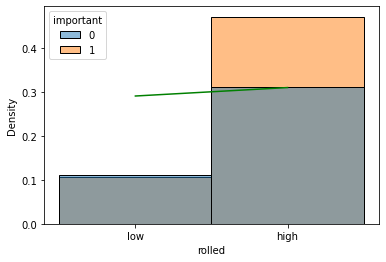

In [8]:
f1, ax1 = plt.subplots()

sns.histplot(data=df_encoded, x="rolled", hue='important',stat="density",ax=ax1)
ax1.plot(["low", "high"], [0.0484*6,0.0516*6], 'g-', label='Expected Density');